<a href="https://colab.research.google.com/github/LizaPiya/IPH-DS-LLM-Projects/blob/main/G35_First_Encounter_and_Diagnosis_FLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
g35_encounter_data = pd.read_csv('/content/drive/MyDrive/Fahmida Liza Piya/EncDiagG35.csv')
g35_encounter_data.head(100)

,DiagnosisReportingDate,EncounterReportingDate,emrcode,clinicid,diagnosisdate,onsetdate,dateresolved,patientpseudonymtoken,encounterdatetime,encountertype,encounterdescription
0,20160801,20200501,G35,1507,201608021515,20160802,NaN,u+zc4YYE+L2f940WCMPhNPaYyfBv6yBRZ5HrdqvNo4V43M...,201801041130,8.0,OFFICE VISIT
1,20160801,20200501,G35,1507,201608021515,20160802,NaN,u+zc4YYE+L2f940WCMPhNPaYyfBv6yBRZ5HrdqvNo4V43M...,201708241130,8.0,OFFICE VISIT
2,20160801,20200501,G35,1507,201608021515,20160802,NaN,u+zc4YYE+L2f940WCMPhNPaYyfBv6yBRZ5HrdqvNo4V43M...,201704201130,8.0,OFFICE VISIT
3,20160801,20200501,G35,1507,201608021515,20160802,NaN,u+zc4YYE+L2f940WCMPhNPaYyfBv6yBRZ5HrdqvNo4V43M...,201612131215,8.0,OFFICE VISIT
4,20160801,20200501,G35,1507,201608021515,20160802,NaN,u+zc4YYE+L2f940WCMPhNPaYyfBv6yBRZ5HrdqvNo4V43M...,201608021515,8.0,OFFICE VISIT
...,...,...,...,...,...,...,...,...,...,...,...
95,20220201,20210301,G35,666,202202011030,20220201,NaN,wC9B/gJogSSK5dlY1asu00Bd6j5U1ADkHP3wI4MRwC1Ejj...,202103291046,39.0,PATIENT COMMUNICATION
96,20220201,20210301,G35,666,202202011030,20220201,NaN,wC9B/gJogSSK5dlY1asu00Bd6j5U1ADkHP3wI4MRwC1Ejj...,202103260815,NaN,NaN
97,20220201,20210301,G35,666,202202011030,20220201,NaN,wC9B/gJogSSK5dlY1asu00Bd6j5U1ADkHP3wI4MRwC1Ejj...,202103231629,39.0,PATIENT COMMUNICATION
98,20220201,20210301,G35,666,202202011030,20220201,NaN,wC9B/gJogSSK5dlY1asu00Bd6j5U1ADkHP3wI4MRwC1Ejj...,202103151551,39.0,PATIENT COMMUNICATION


In [ ]:
# Get the total number of rows using len()
total_rows = len(g35_encounter_data)

print("Total number of rows:", total_rows)

Total number of rows: 41356548


In [ ]:
# prompt: Take 50% of the data

g35_encounter_data_sample = g35_encounter_data.sample(frac=0.50)


In [ ]:
# Get the total number of rows using len()
total_rows = len(g35_encounter_data_sample)

print("Total number of rows:", total_rows)


Total number of rows: 20678274


In [ ]:
g35_encounter_data.nunique()

DiagnosisReportingDate       105
EncounterReportingDate        56
emrcode                        1
clinicid                      21
diagnosisdate             109445
onsetdate                   2565
dateresolved                   6
patientpseudonymtoken       7814
encounterdatetime         234320
encountertype                 55
encounterdescription          55
dtype: int64

In [ ]:
g35_encounter_data_sample.nunique()

DiagnosisReportingDate       105
EncounterReportingDate        56
emrcode                        1
clinicid                      21
diagnosisdate             108831
onsetdate                   2561
dateresolved                   6
patientpseudonymtoken       7633
encounterdatetime         230114
encountertype                 54
encounterdescription          54
dtype: int64

In [ ]:
g35_encounter_data_sample.head(200)

,DiagnosisReportingDate,EncounterReportingDate,emrcode,clinicid,diagnosisdate,onsetdate,dateresolved,patientpseudonymtoken,encounterdatetime,encountertype,encounterdescription
38502788,20180701,20230401,G35,998,201806211500,20180621,NaN,oFjrgek+Jjn8oZq6rL5Pv4ibu92++r2DGSnnmTPZt08Scu...,202304181030,8.0,OFFICE VISIT
33999342,20221101,20200601,G35,998,202209291030,20220929,NaN,YCbTBPuHN2acKaFAlIKddUF1pPFawToRuILHnlhkchHNrB...,202005281101,NaN,NaN
35832901,20190801,20230401,G35,998,201908310730,20190831,NaN,whjbiX3rpxFrXJ+vEfjbGuFFcV0QFxyuMlIV98zumInFoI...,202304150915,NaN,NaN
32165122,20180301,20210701,G35,998,201803060906,20180306,NaN,Z9WJG70SFFg/fn0pWNN4ILgi3o1rcclzMDXktqWg/vFbkR...,202107061045,NaN,NaN
17793474,20210701,20230501,G35,998,202107061030,20210706,NaN,OCHXXCQFyCpGGs9Iz3rYi3TEZg0mGuuTGBe9nQUGJJxsLC...,202304121036,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24769913,20171001,20210501,G35,998,201710301626,20171030,NaN,ncqf7jdERPWx2f1x18WgvDZMbTj24PRVy0NvEL8IO7RtmI...,202104261330,8.0,OFFICE VISIT
20137916,20180101,20200201,G35,998,201712111354,20171211,NaN,pPGDCIZTAx10abzVzzFh1Qv5ruXqVpfRH7QX0wR64LhdVj...,202001271440,NaN,NaN
29159131,20200801,20191001,G35,998,202007281345,20200728,NaN,iXULKGxYXbjc9CkgH9kIp8lYEKzTnHRa0r1MqXFnPf8XoC...,201909261630,39.0,PATIENT COMMUNICATION
3959161,20180601,20200801,G35,998,201806201400,20180620,NaN,uFYUKCu9e3WiTujQ9l6xSX6Fxbdj9iVVFXLUQNQ2K/TOw+...,202008251028,39.0,PATIENT COMMUNICATION


In [ ]:
# Convert 'encounterdatetime' to datetime format using the specified pattern
g35_encounter_data_sample['diagnosisdate'] = pd.to_datetime(g35_encounter_data_sample['diagnosisdate'], format='%Y%m%d%H%M')


In [ ]:
g35_encounter_data_sample['diagnosisdate'].head(5)

38502788   2018-06-21 15:00:00
33999342   2022-09-29 10:30:00
35832901   2019-08-31 07:30:00
32165122   2018-03-06 09:06:00
17793474   2021-07-06 10:30:00
Name: diagnosisdate, dtype: datetime64[ns]

# **Finding Diagnosis date for one single patient**

In [ ]:
# Specify the patient pseudonym token you want to filter by
specific_patient_token = '++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh84jFkKHrIyxz3smXPEDz2qQGN2KTqSwdh6zsG65w'

# Filter the DataFrame for the specific patient pseudonym token
g35_encounter_data_sample= g35_encounter_data_sample[g35_encounter_data_sample['patientpseudonymtoken'] == specific_patient_token]

# Display the filtered DataFrame
g35_encounter_data_sample.head(2000)

,DiagnosisReportingDate,EncounterReportingDate,emrcode,clinicid,diagnosisdate,onsetdate,dateresolved,patientpseudonymtoken,encounterdatetime,encountertype,encounterdescription
24187826,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE
8473990,20160601,20191201,G35,998,2016-06-10 14:13:00,20160610,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,201911191048,39.0,PATIENT COMMUNICATION
12399868,20161201,20190801,G35,998,2016-12-02 10:57:00,20161202,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,201907151525,39.0,PATIENT COMMUNICATION
8506464,20200901,20200301,G35,998,2020-09-11 10:30:00,20200911,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202003110755,39.0,PATIENT COMMUNICATION
4580380,20190301,20200101,G35,998,2019-03-25 09:53:00,20190325,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,201905151030,8.0,OFFICE VISIT
...,...,...,...,...,...,...,...,...,...,...,...
4573180,20170801,20211101,G35,998,2017-04-13 07:53:00,20170413,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202111100904,NaN,NaN
8438901,20181101,20220401,G35,998,2018-11-16 10:00:00,20181116,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202203021000,8.0,OFFICE VISIT
31415740,20190801,20200701,G35,998,2019-08-21 09:43:00,20190821,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,201504010816,8.0,OFFICE VISIT
4572841,20170801,20210601,G35,998,2016-05-19 14:50:00,20160519,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202105190901,NaN,NaN


In [ ]:
# Create a new DataFrame with only the specified columns
First_Office_Visit_Analysis = g35_encounter_data_sample[['patientpseudonymtoken', 'encounterdatetime','encounterdescription']]
First_Office_Visit_Analysis.head(1000)

,patientpseudonymtoken,encounterdatetime,encounterdescription
24187826,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,CHART UPDATE
8473990,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,201911191048,PATIENT COMMUNICATION
12399868,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,201907151525,PATIENT COMMUNICATION
8506464,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202003110755,PATIENT COMMUNICATION
4580380,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,201905151030,OFFICE VISIT
...,...,...,...
27916524,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202212020926,NaN
4572839,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202008141515,CHART UPDATE
27908433,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,201905151030,OFFICE VISIT
27908494,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202202160943,NaN


In [ ]:
# Convert 'encounterdatetime' to datetime format using the specified pattern
First_Office_Visit_Analysis['encounterdatetime'] = pd.to_datetime(First_Office_Visit_Analysis['encounterdatetime'], format='%Y%m%d%H%M')

# Sort the DataFrame by 'patientpseudonymtoken' and 'encounterdatetime'
sorted_dataframe = First_Office_Visit_Analysis.sort_values(by=['patientpseudonymtoken', 'encounterdatetime'])

# Display the sorted DataFrame
sorted_dataframe.head(100)

<ipython-input-15-bd5f450fcfef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  First_Office_Visit_Analysis['encounterdatetime'] = pd.to_datetime(First_Office_Visit_Analysis['encounterdatetime'], format='%Y%m%d%H%M')


,patientpseudonymtoken,encounterdatetime,encounterdescription
4573398,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2009-07-10 00:00:00,NaN
24306161,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2009-07-10 00:00:00,NaN
20438161,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2009-07-10 00:00:00,NaN
28023319,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2009-07-10 00:00:00,NaN
4573134,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2009-07-10 00:00:00,NaN
...,...,...,...
12399870,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-05-15 10:30:00,OFFICE VISIT
4573209,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-05-15 10:30:00,OFFICE VISIT
4572857,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-05-15 10:30:00,OFFICE VISIT
4573297,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-05-15 10:30:00,OFFICE VISIT


In [ ]:
sorted_dataframe.nunique()

patientpseudonymtoken     1
encounterdatetime        46
encounterdescription      3
dtype: int64

In [ ]:
# prompt: drop duplicate encounterdatetime from the sorted_dataframe

sorted_dataframe = sorted_dataframe.drop_duplicates(subset='encounterdatetime', keep='first')
#sorted_dataframe.head(100)

In [ ]:
# Drop rows where 'encounterdescription' is NaN
sorted_dataframe = sorted_dataframe.dropna(subset=['encounterdescription'])
sorted_dataframe.head(1000)

,patientpseudonymtoken,encounterdatetime,encounterdescription
8506505,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2015-04-01 08:16:00,OFFICE VISIT
8438964,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2018-11-16 10:00:00,OFFICE VISIT
4580380,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-05-15 10:30:00,OFFICE VISIT
12399868,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-07-15 15:25:00,PATIENT COMMUNICATION
16395612,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-07-16 11:44:00,PATIENT COMMUNICATION
12399866,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-08-13 08:40:00,PATIENT COMMUNICATION
20376544,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-08-21 09:43:00,PATIENT COMMUNICATION
4572960,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-09-26 10:33:00,PATIENT COMMUNICATION
8473990,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-11-19 10:48:00,PATIENT COMMUNICATION
4573250,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-11-20 12:35:00,CHART UPDATE


In [ ]:
sorted_dataframe.nunique()

patientpseudonymtoken     1
encounterdatetime        26
encounterdescription      3
dtype: int64

In [ ]:
# Group by 'patientpseudonymtoken' and get the first encounter date for each group
sorted_dataframe['first_encounter'] = sorted_dataframe.groupby('patientpseudonymtoken')['encounterdatetime'].transform('first')

# Display the DataFrame with the new column
sorted_dataframe.head(100)

,patientpseudonymtoken,encounterdatetime,encounterdescription,first_encounter
8506505,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2015-04-01 08:16:00,OFFICE VISIT,2015-04-01 08:16:00
8438964,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2018-11-16 10:00:00,OFFICE VISIT,2015-04-01 08:16:00
4580380,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-05-15 10:30:00,OFFICE VISIT,2015-04-01 08:16:00
12399868,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-07-15 15:25:00,PATIENT COMMUNICATION,2015-04-01 08:16:00
16395612,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-07-16 11:44:00,PATIENT COMMUNICATION,2015-04-01 08:16:00
12399866,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-08-13 08:40:00,PATIENT COMMUNICATION,2015-04-01 08:16:00
20376544,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-08-21 09:43:00,PATIENT COMMUNICATION,2015-04-01 08:16:00
4572960,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-09-26 10:33:00,PATIENT COMMUNICATION,2015-04-01 08:16:00
8473990,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-11-19 10:48:00,PATIENT COMMUNICATION,2015-04-01 08:16:00
4573250,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2019-11-20 12:35:00,CHART UPDATE,2015-04-01 08:16:00


In [ ]:
g35_encounter_data_sample.head(20)

,DiagnosisReportingDate,EncounterReportingDate,emrcode,clinicid,diagnosisdate,onsetdate,dateresolved,patientpseudonymtoken,encounterdatetime,encountertype,encounterdescription
24187826,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE
8473990,20160601,20191201,G35,998,2016-06-10 14:13:00,20160610,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,201911191048,39.0,PATIENT COMMUNICATION
12399868,20161201,20190801,G35,998,2016-12-02 10:57:00,20161202,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,201907151525,39.0,PATIENT COMMUNICATION
8506464,20200901,20200301,G35,998,2020-09-11 10:30:00,20200911,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202003110755,39.0,PATIENT COMMUNICATION
4580380,20190301,20200101,G35,998,2019-03-25 09:53:00,20190325,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,201905151030,8.0,OFFICE VISIT
16395625,20221201,20201101,G35,998,2022-12-15 09:00:00,20221215,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202003110755,39.0,PATIENT COMMUNICATION
4572992,20170801,20211201,G35,998,2016-12-02 10:57:00,20161202,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202111171431,NaN,NaN
4573177,20170801,20190801,G35,998,2017-04-13 07:53:00,20170413,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,201906271358,NaN,NaN
28023339,20170401,20201201,G35,998,2017-04-13 07:53:00,20170413,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202006111057,NaN,NaN
20376544,20190601,20190901,G35,998,2019-06-27 13:58:00,20190627,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,201908210943,39.0,PATIENT COMMUNICATION


In [ ]:
# Select only the required columns
First_Encounter_Date = sorted_dataframe[['patientpseudonymtoken', 'first_encounter']]
First_Encounter_Date.head(100)

,patientpseudonymtoken,first_encounter
8506505,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2015-04-01 08:16:00
8438964,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2015-04-01 08:16:00
4580380,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2015-04-01 08:16:00
12399868,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2015-04-01 08:16:00
16395612,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2015-04-01 08:16:00
12399866,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2015-04-01 08:16:00
20376544,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2015-04-01 08:16:00
4572960,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2015-04-01 08:16:00
8473990,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2015-04-01 08:16:00
4573250,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,2015-04-01 08:16:00


# **Joining first encounter date with g35_encounter_data_sample**

In [ ]:
# Join the DataFrames on 'patientpseudonymtoken'
merged_df = pd.merge(g35_encounter_data_sample, First_Encounter_Date, on='patientpseudonymtoken', how='left')

# Display the merged DataFrame
merged_df.head(100)

,DiagnosisReportingDate,EncounterReportingDate,emrcode,clinicid,diagnosisdate,onsetdate,dateresolved,patientpseudonymtoken,encounterdatetime,encountertype,encounterdescription,first_encounter
0,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00
1,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00
2,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00
3,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00
4,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...
95,20200901,20200301,G35,998,2020-09-11 10:30:00,20200911,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202003110755,39.0,PATIENT COMMUNICATION,2015-04-01 08:16:00
96,20200901,20200301,G35,998,2020-09-11 10:30:00,20200911,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202003110755,39.0,PATIENT COMMUNICATION,2015-04-01 08:16:00
97,20200901,20200301,G35,998,2020-09-11 10:30:00,20200911,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202003110755,39.0,PATIENT COMMUNICATION,2015-04-01 08:16:00
98,20200901,20200301,G35,998,2020-09-11 10:30:00,20200911,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202003110755,39.0,PATIENT COMMUNICATION,2015-04-01 08:16:00


In [ ]:
# Calculate the difference in days between 'diagnosisdate' and 'first_encounter'
merged_df['date_difference'] = (merged_df['diagnosisdate']- merged_df['first_encounter']).dt.days

# Display the DataFrame with the new column
merged_df.head(100)

,DiagnosisReportingDate,EncounterReportingDate,emrcode,clinicid,diagnosisdate,onsetdate,dateresolved,patientpseudonymtoken,encounterdatetime,encountertype,encounterdescription,first_encounter,date_difference
0,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00,2217
1,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00,2217
2,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00,2217
3,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00,2217
4,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00,2217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20200901,20200301,G35,998,2020-09-11 10:30:00,20200911,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202003110755,39.0,PATIENT COMMUNICATION,2015-04-01 08:16:00,1990
96,20200901,20200301,G35,998,2020-09-11 10:30:00,20200911,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202003110755,39.0,PATIENT COMMUNICATION,2015-04-01 08:16:00,1990
97,20200901,20200301,G35,998,2020-09-11 10:30:00,20200911,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202003110755,39.0,PATIENT COMMUNICATION,2015-04-01 08:16:00,1990
98,20200901,20200301,G35,998,2020-09-11 10:30:00,20200911,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202003110755,39.0,PATIENT COMMUNICATION,2015-04-01 08:16:00,1990


from matplotlib import pyplot as plt
_df_0['DiagnosisReportingDate'].plot(kind='hist', bins=20, title='DiagnosisReportingDate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['EncounterReportingDate'].plot(kind='hist', bins=20, title='EncounterReportingDate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['onsetdate'].plot(kind='hist', bins=20, title='onsetdate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['encounterdatetime'].plot(kind='hist', bins=20, title='encounterdatetime')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('encounterdescription').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='DiagnosisReportingDate', y='EncounterReportingDate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='EncounterReportingDate', y='onsetdate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='onsetdate', y='encounterdatetime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='encounterdatetime', y='encountertype', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['diagnosisdate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'diagnosisdate'}, axis=1)
              .sort_values('diagnosisdate', ascending=True))
  xs = counted['diagnosisdate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('diagnosisdate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('encounterdescription')):
  _plot_series(series, series_name, i)
  fig.legend(title='encounterdescription', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('diagnosisdate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['DiagnosisReportingDate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'DiagnosisReportingDate'}, axis=1)
              .sort_values('DiagnosisReportingDate', ascending=True))
  xs = counted['DiagnosisReportingDate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('DiagnosisReportingDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('encounterdescription')):
  _plot_series(series, series_name, i)
  fig.legend(title='encounterdescription', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DiagnosisReportingDate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['EncounterReportingDate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'EncounterReportingDate'}, axis=1)
              .sort_values('EncounterReportingDate', ascending=True))
  xs = counted['EncounterReportingDate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('EncounterReportingDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('encounterdescription')):
  _plot_series(series, series_name, i)
  fig.legend(title='encounterdescription', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EncounterReportingDate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['clinicid']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'clinicid'}, axis=1)
              .sort_values('clinicid', ascending=True))
  xs = counted['clinicid']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('clinicid', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('encounterdescription')):
  _plot_series(series, series_name, i)
  fig.legend(title='encounterdescription', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('clinicid')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_13['DiagnosisReportingDate'].plot(kind='line', figsize=(8, 4), title='DiagnosisReportingDate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['EncounterReportingDate'].plot(kind='line', figsize=(8, 4), title='EncounterReportingDate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['onsetdate'].plot(kind='line', figsize=(8, 4), title='onsetdate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['encounterdatetime'].plot(kind='line', figsize=(8, 4), title='encounterdatetime')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['encounterdescription'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='DiagnosisReportingDate', y='encounterdescription', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['encounterdescription'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='EncounterReportingDate', y='encounterdescription', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['encounterdescription'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='onsetdate', y='encounterdescription', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['encounterdescription'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='encounterdatetime', y='encounterdescription', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Create a new DataFrame with only the first 10000 patients
first_10000_patients_df = merged_df.head(10000)

# Display the new DataFrame
first_10000_patients_df.head(10000)


,DiagnosisReportingDate,EncounterReportingDate,emrcode,clinicid,diagnosisdate,onsetdate,dateresolved,patientpseudonymtoken,encounterdatetime,encountertype,encounterdescription,first_encounter,date_difference
0,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00,2217
1,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00,2217
2,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00,2217
3,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00,2217
4,20210401,20200901,G35,998,2021-04-26 11:12:00,20210426,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202009041240,1.0,CHART UPDATE,2015-04-01 08:16:00,2217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20201101,20210401,G35,998,2020-11-03 13:46:00,20201103,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202011031346,NaN,NaN,2015-04-01 08:16:00,2043
9996,20201101,20210401,G35,998,2020-11-03 13:46:00,20201103,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202011031346,NaN,NaN,2015-04-01 08:16:00,2043
9997,20201101,20210401,G35,998,2020-11-03 13:46:00,20201103,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202011031346,NaN,NaN,2015-04-01 08:16:00,2043
9998,20201101,20210401,G35,998,2020-11-03 13:46:00,20201103,NaN,++do59X8IHGWfpGsRHCvB+NAhQKzIMWCZtzG2RXmKTiwYh...,202011031346,NaN,NaN,2015-04-01 08:16:00,2043


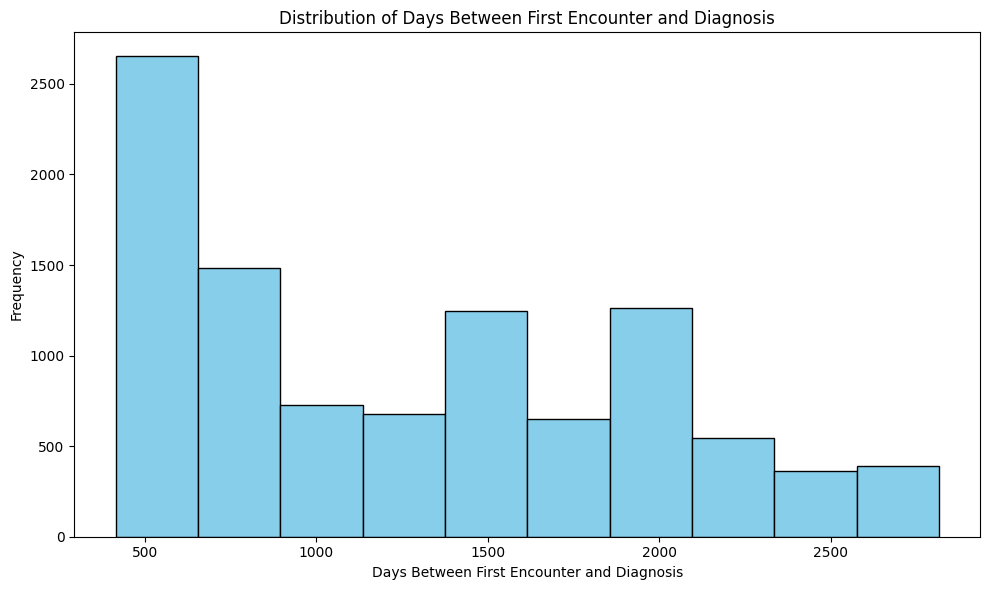

In [ ]:
# Histogram of the date differences
plt.figure(figsize=(10, 6))
plt.hist(first_10000_patients_df['date_difference'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Days Between First Encounter and Diagnosis')
plt.ylabel('Frequency')
plt.title('Distribution of Days Between First Encounter and Diagnosis')
plt.tight_layout()
plt.show()

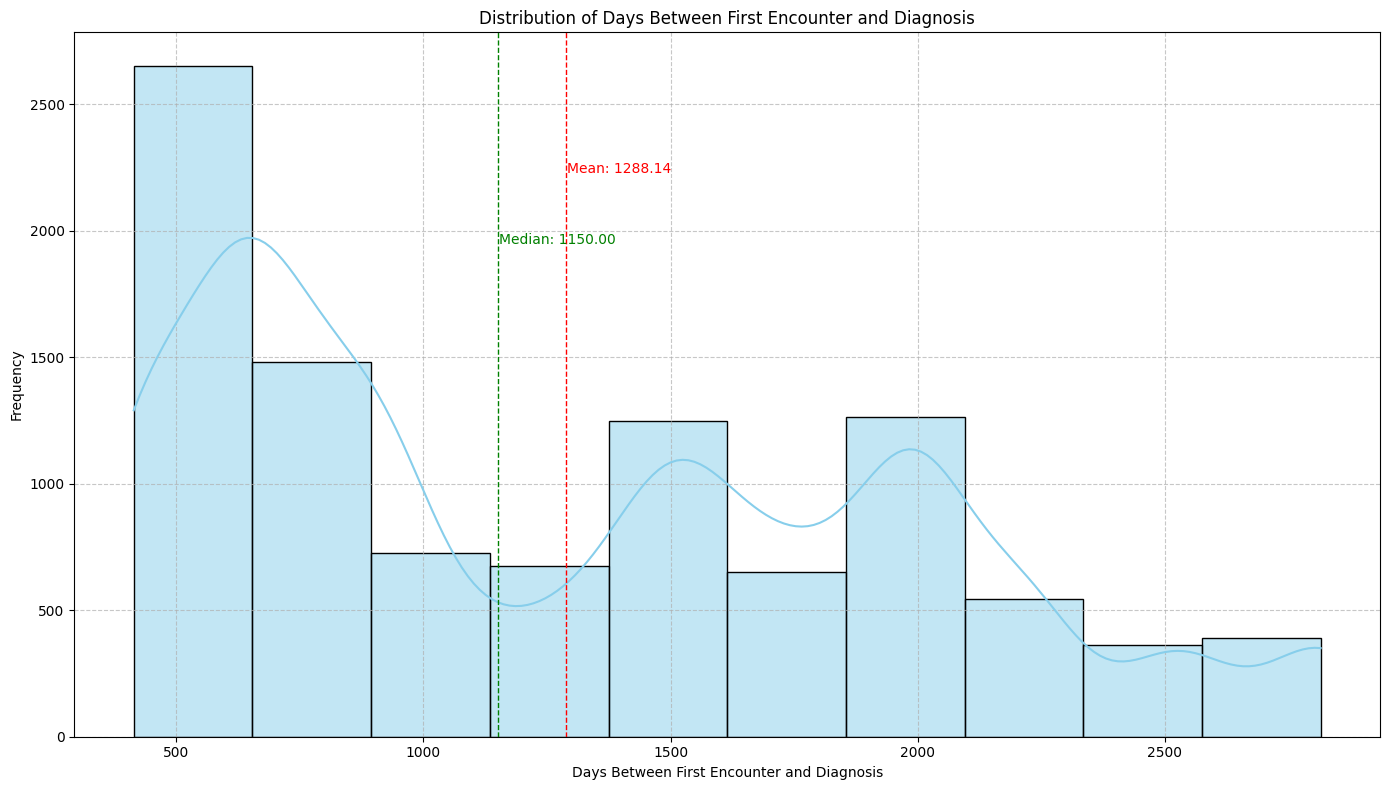

In [ ]:
# Calculate mean and median
mean_diff = first_10000_patients_df['date_difference'].mean()
median_diff = first_10000_patients_df['date_difference'].median()

# Create the histogram with KDE plot
plt.figure(figsize=(14, 8))
sns.histplot(first_10000_patients_df['date_difference'], bins=10, kde=True, color='skyblue', edgecolor='black')

# Add mean and median lines
plt.axvline(mean_diff, color='red', linestyle='dashed', linewidth=1)
plt.axvline(median_diff, color='green', linestyle='dashed', linewidth=1)

# Annotate mean and median
plt.text(mean_diff + 2, plt.gca().get_ylim()[1] * 0.8, f'Mean: {mean_diff:.2f}', color='red')
plt.text(median_diff + 2, plt.gca().get_ylim()[1] * 0.7, f'Median: {median_diff:.2f}', color='green')

# Labeling the axes and title
plt.xlabel('Days Between First Encounter and Diagnosis')
plt.ylabel('Frequency')
plt.title('Distribution of Days Between First Encounter and Diagnosis')

# Customizing the grid
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create the line chart
plt.figure(figsize=(14, 8))

# Plot first_encounter dates using the index for the x-axis
#plt.plot(first_10000_patients_df.index, first_10000_patients_df['first_encounter'], marker='o', linestyle='-', label='First Encounter Date')

# Plot diagnosisdate dates using the index for the x-axis
plt.plot(first_10000_patients_df.index, first_10000_patients_df['diagnosisdate'], marker='o', linestyle='-', label='Diagnosis Date')

# Labeling the axes
plt.xlabel('Patients')
plt.ylabel('Date')
plt.title('First Encounter Date and Diagnosis Date for Each Patient')

# Adding a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined